## Regresión Lineal Simple 
Predecir las calorías quemadas por minutos corriendo
Tipo de problema de ML: regresión
Tipo de aprendizaje: supervisado

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv("calories_time.csv")
df.sample(5)

,Calories,Time
1176,991.7,54.1
1299,895.4,52.0
1277,983.2,63.2
1889,322.7,18.3
3004,207.6,13.9


In [3]:
X = df['Time'].values
y = df['Calories'].values

# Pasamos la variable independiente (X) de un array a un array de arrays.
X = np.reshape(np.asarray(X), (len(X), 1))

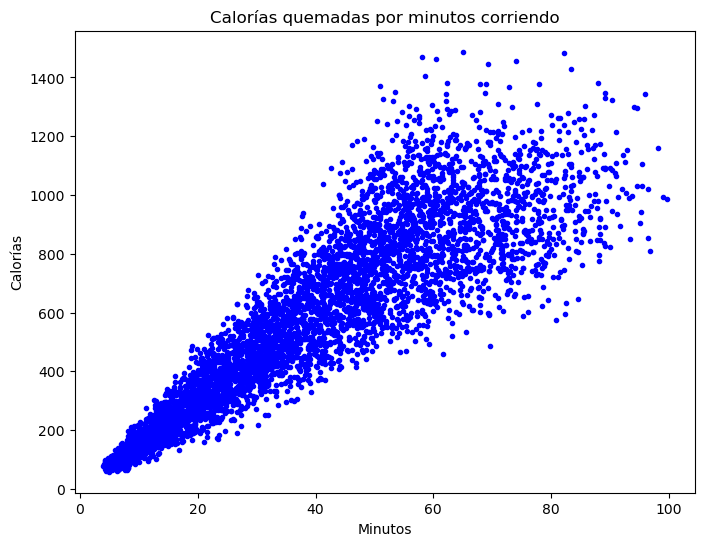

In [4]:
fig, ax =  plt.subplots(figsize=(8, 6))
ax.scatter(X, y,  color='blue', marker='.', )
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
plt.show()

In [5]:
# Creamos un objeto de la clase LinearRegression
reg = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg.fit(X, y)

LinearRegression()

In [6]:
# Obtenemos los coeficientes
a = reg.coef_[0]
b = reg.intercept_

print ("Y = {a:0.2f}X + {b:0.2f}".format(a=a, b=b))
print ("\nCalorias = {a:0.2f} · Tiempo + {b:0.2f}".format(a=a, b=b))

Y = 12.92X + 71.14

Calorias = 12.92 · Tiempo + 71.14


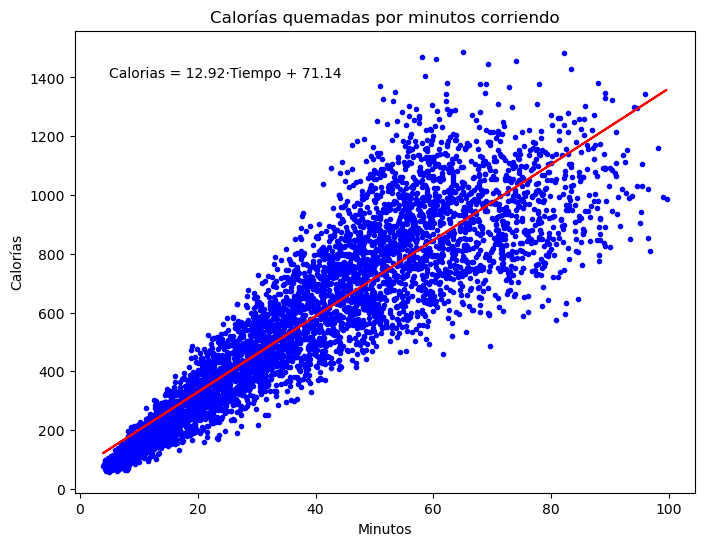

In [7]:
# Obtenemos las predicciones de los elementos del Dataset con el modelo generado
predicciones = reg.predict(X)

# Pintamos los elementos y la recta de regresión
fig, ax =  plt.subplots(figsize=(8, 6))
ax.scatter(X, y,  color='blue', marker='.', )
ax.plot(X, predicciones, color='red')
ax.set_title("Calorías quemadas por minutos corriendo")
ax.set_xlabel("Minutos")
ax.set_ylabel("Calorías")
ax.text(5, 1400,"Calorias = {a:0.2f}·Tiempo + {b:0.2f}".format(a=a, b=b))
plt.show()

Medición de la calidad de los resultados

Para el caso de la Regresión Lineal, el método score(X,y) devuelve la medida del Coeficiente de Determinación R2 que es una medida que nos dice cuanto se ajusta la recta a los datos con los que se ha obtenido la recta, siendo valor '1' un ajuste perfecto y valor '0' un desajuste perfecto.

In [8]:
r2 = reg.score(X, y)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Coeficiente de determinación R^2: 0.7958949823355901


In [14]:
calorias = round((12.92 * 18.3) + 71.14,2)

In [15]:
calorias

307.58

In [ ]:
Según nuestros datos reales, si una persona corre 18.3 minutos, quema 322.7 calorias.
Utilizando nuestro modelo, probamos con 18.3 minutos y obtenemos que se queman 307.50 calorias 

## Regresión Lineal Múltiple 
Predecir cuantas calorías quema una persona en función de los minutos que corre, la velocidad a la que corre y su peso corporal
Tipo de problema de ML: regresión
Tipo de aprendizaje: supervisado

In [17]:
df = pd.read_csv("calories_time_weight_speed.csv")
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad
4419,482.6,36.6,65.9,11.6
4137,242.7,17.2,72.7,11.2
1170,1342.1,96.0,89.5,9.1
2271,538.6,34.1,66.4,13.8
3716,303.8,17.0,73.7,14.0


In [18]:
X = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

In [19]:
# Creamos un objeto de la clase LinearRegression
reg_mul = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul.fit(X, y)

LinearRegression()

In [20]:
# Obtenemos los coeficientes
betas = reg_mul.coef_
beta_0 = reg_mul.intercept_

print ("Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2]))
print ("\nCalorias = {b0:0.2f} + {b1:0.2f}·Tiempo + {b2:0.2f}·Velocidad + {b3:0.2f}·Peso"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2]))

Y = -1164.85 + 14.26X1 + 46.66X2 + 8.55X3

Calorias = -1164.85 + 14.26·Tiempo + 46.66·Velocidad + 8.55·Peso


Medición de la calidad de los resultados

In [21]:
r2 = reg_mul.score(X, y)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Coeficiente de determinación R^2: 0.9539022259261689


La escala de R2 es intuitiva, va de 0 a 1, con 0 indicando que el modelo
propuesto no mejora la predicción sobre el modelo medido y 1 indica una predicción perfecta.
En nuestro caso mejora la predicción en un 95 %

Tomamos una fila de nuestro dataset original  y utilizamos el modelo para chequear los resultados que predice 

In [22]:
df.iloc[4419]

Calorias     482.6
Tiempo        36.6
Peso          65.9
Velocidad     11.6
Name: 4419, dtype: float64

In [25]:
Calorias = round(-1164.85 + (14.26*36.6) + (46.66*11.6) + (8.55*65.9),2)

In [26]:
Calorias

461.77

Según nuestros datos reales, si una persona corre 36.6 minutos,  a una velocidad de 11.6 y su peso corporal es 65.9, quema 482,6 calorias. Utilizando nuestros modelo, predecimos que se queman 461,77 calorias 

## Regresión Lineal Múltiple con datos de entreamiento y test 

Predecir cuantas calorías quema una persona en función de los minutos que corre, la velocidad a la que corre y su peso corporal, utilizando un modelo de regresión lineal múltiple con datos de entrenamiento y testear el modelo o hipótesis obtenido con los datos de test.

Particionado de datos en Entrenamiento y Test
En este punto vamos a dividir el dataset en un conjunto de datos de entrenamiento y datos de test.
Para ello vamos a llamar a la función train_test_split() y dividimos los datos en entrenamiento y test. Para este ejemplo vamos a tomar un 20% de datos de test y un 80% de datos de entrenamiento.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
X = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

In [38]:
np.random.seed(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Creamos un objeto de la clase LinearRegression
reg_mul_2 = linear_model.LinearRegression()

# Entrenamos el modelo pasandole las variables independientes y dependiente
reg_mul_2.fit(X_train, y_train)

LinearRegression()

In [40]:
# Obtenemos los coeficientes
betas_2 = reg_mul_2.coef_
beta_0_2 = reg_mul_2.intercept_

print ("Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3"
       .format(b0=beta_0_2, b1=betas_2[0], b2=betas_2[1], b3=betas_2[2]))
print ("\nCalorias = {b0:0.2f} + {b1:0.2f}·Tiempo + {b2:0.2f}·Velocidad + {b3:0.2f}·Peso"
       .format(b0=beta_0_2, b1=betas_2[0], b2=betas_2[1], b3=betas_2[2]))

Y = -1153.30 + 14.22X1 + 46.58X2 + 8.43X3

Calorias = -1153.30 + 14.22·Tiempo + 46.58·Velocidad + 8.43·Peso


In [43]:
# Obtenemos las predicciones del modelo con los datos de entrenamiento
y_predict = reg_mul_2.predict(X_train)
# Calculamos los errores
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_predict)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_train))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_train))
r2 = reg_mul_2.score(X_train, y_train)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Error Absoluto Medio (MAE): 48.143486667833876
Error Cuadrático Medio (MSE): 4425.892283745691
Coeficiente de determinación R^2: 0.9535978794527412


**Evaluación del modelo con los datos de Test

Vamos a realizar los mismos pasos que en el punto anterior, pero en este caso vamos a ver el error cometido con los datos de test.
Para ello necesitamos predecir cual es la salida del modelo con los datos de test y esto lo hacemos llamando al método .predict(X).

Con las predicciones y los resultados reales calculamos los errores

In [44]:
# Obtenemos las predicciones del modelo con los datos de test
y_predict = reg_mul_2.predict(X_test)

# Calculamos los errores
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_predict)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_test))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_test))

r2 = reg_mul_2.score(X_test, y_test)

print ("Coeficiente de determinación R^2: {r2}".format(r2=r2))

Error Absoluto Medio (MAE): 48.44305689079676
Error Cuadrático Medio (MSE): 4508.549637473967
Coeficiente de determinación R^2: 0.9548663126954258


## Conclusiones: Comparativa de resultados
Podemos observar que los errores cometidos con los datos de entrenamiento y test son muy similares.
El error absoluto medio nos dice el error medio que cometemos en la predicción de las calorias quemadas; es decir, que al hacer las predicciones nos equivocamos de media en 48 calorias.
Si nos fijamos el MAE es practicamente igual evaluándolo tanto con los datos de entrenamiento como con los de test, lo que significa que el modelo generado es un modelo muy estable que generaliza bastante bien.


Si los errores cometidos con los datos de entrenamiento y test fuesen muy dispares podria significar que:

Tenemos pocos datos de los que aprender.
- Hay mucha varianza en los datos.
- Estamos particionando mal los datos en entrenamiento y test (mucho sesgo en cada partición)
- Estamos entrenando mal nuestro modelo
- Etc.